In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [40]:
data=pd.read_csv("D:\Excel R\Assignments\Assignment 18\Airlines+Data.csv")
data

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [42]:
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [43]:
### Converting the month column to Date-Time:-
data['Date']=pd.to_datetime(data.Month,format='%b-%y')
data['Month']=data.Date.dt.strftime('%b')    ### Month Extraction
data['Year']=data.Date.dt.strftime('%Y')

<AxesSubplot:xlabel='Month', ylabel='Year'>

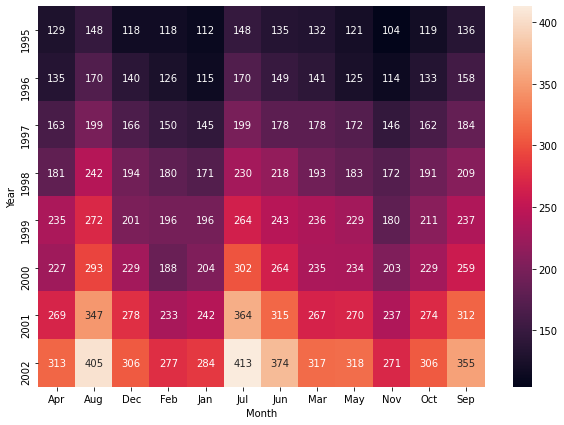

In [44]:
### Heatmap:-
plt.figure(figsize=(10,7))
heatmap=pd.pivot_table(data=data,values='Passengers',index='Year',columns='Month',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap,annot=True,fmt='g')

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

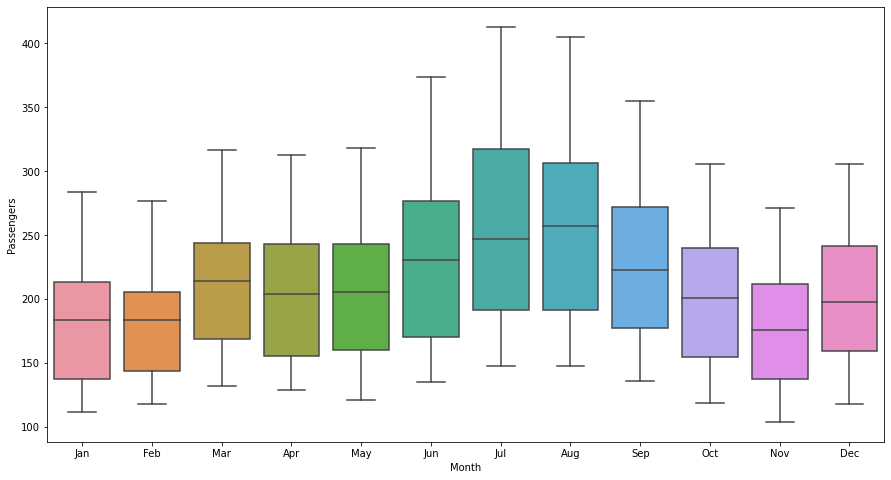

In [50]:
### Boxplot-1:-
plt.figure(figsize=(15,8))
sns.boxplot(x='Month',y='Passengers',data=data)

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

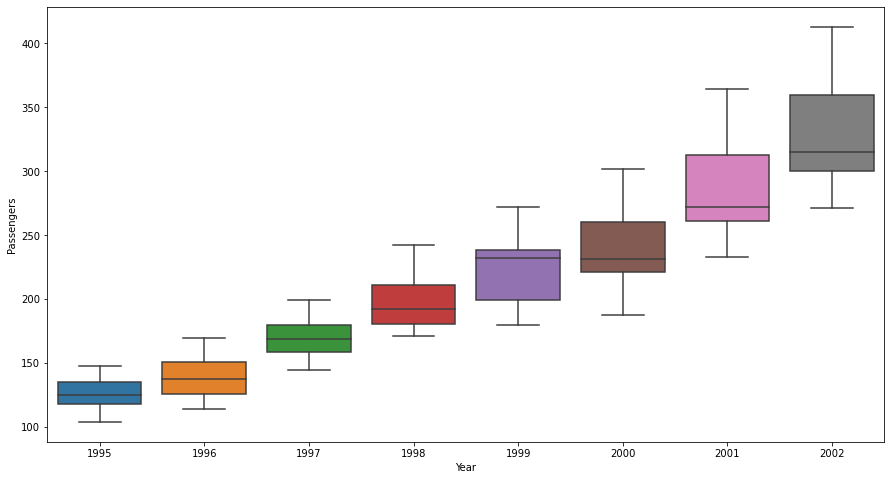

In [51]:
### Boxplot-2:-
plt.figure(figsize=(15,8))
sns.boxplot(x='Year',y='Passengers',data=data)

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

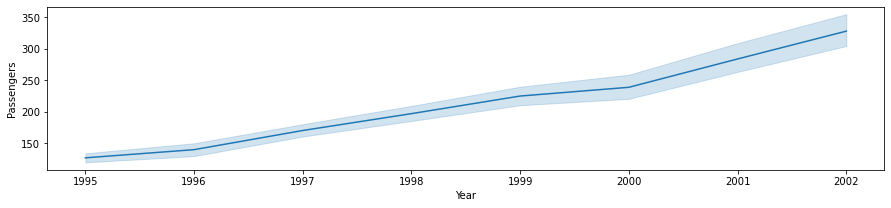

In [57]:
### Lineplot:-
plt.figure(figsize=(15,3))
sns.lineplot(x='Year',y='Passengers',data=data)

In [58]:
data['t']=np.arange(1,97)
data['t2']=np.square(data.t)
data['log_p']=np.log(data.Passengers)
data

,Month,Passengers,Date,Year,t,t2,log_p
0,Jan,112,1995-01-01,1995,1,1,4.718499
1,Feb,118,1995-02-01,1995,2,4,4.770685
2,Mar,132,1995-03-01,1995,3,9,4.882802
3,Apr,129,1995-04-01,1995,4,16,4.859812
4,May,121,1995-05-01,1995,5,25,4.795791
...,...,...,...,...,...,...,...
91,Aug,405,2002-08-01,2002,92,8464,6.003887
92,Sep,355,2002-09-01,2002,93,8649,5.872118
93,Oct,306,2002-10-01,2002,94,8836,5.723585
94,Nov,271,2002-11-01,2002,95,9025,5.602119


In [59]:
d1=pd.get_dummies(data.Month)

In [60]:
df=[data,d1]
d2=pd.concat(df,axis=1,join='inner')
d2

,Month,Passengers,Date,Year,t,t2,log_p,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan,112,1995-01-01,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb,118,1995-02-01,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar,132,1995-03-01,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr,129,1995-04-01,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,May,121,1995-05-01,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug,405,2002-08-01,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,Sep,355,2002-09-01,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,Oct,306,2002-10-01,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,Nov,271,2002-11-01,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


## Creation of different models and computing their RMSE(Root Mean Square Error) for best Forecasting Model:-

In [61]:
train=d2.head(80)
test=d2.tail(20)

In [62]:
### Linear Model:-
lin_mod=smf.ols('Passengers~t',data=train).fit()
pred_lin=pd.Series(lin_mod.predict(pd.DataFrame(test['t'])))
rmse_lin=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_lin))**2))
rmse_lin

49.93726139770773

In [63]:
### Exponential Model:-
exp=smf.ols('log_p~t',data=train).fit()
pred_exp=pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

45.163117094168136

In [65]:
### Quadratic Model:-
quad=smf.ols('Passengers~t+t2',data=train).fit()
pred_quad=pd.Series(quad.predict(test[['t','t2']]))
rmse_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_quad))**2))
rmse_quad

44.96343329837638

In [67]:
### Additive Seasonality Model:-
add_sea=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea=pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

124.69166211462185

In [70]:
### Additive Seasonality Quadratic Model:-
add_sea_quad=smf.ols('Passengers~t+t2+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea_quad=pd.Series(add_sea_quad.predict(test[['t','t2','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

24.240007330314903

In [72]:
### Multiplicative Seasonality Model:-
mul_sea=smf.ols('log_p~Jan+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_mult_sea=pd.Series(mul_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mult_sea=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

131.21970625472596

In [73]:
### Multiplicative Additive Seasonality Model:-
mul_add_sea=smf.ols('log_p~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_mul_add_sea=pd.Series(mul_add_sea.predict(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mult_add_sea=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_add_sea)))**2))
rmse_mult_add_sea

9.922645280278358

In [74]:
### Multiplicative Quadratic Seasonality Model:-
mul_quad_sea=smf.ols('log_p~t+t2+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_mul_quad_sea=pd.Series(mul_quad_sea.predict(test[['t','t2','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mul_quad_sea=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_quad_sea)))**2))
rmse_mul_quad_sea

22.216153863683246

In [75]:
### Comparing the results:-
d={'Model':pd.Series(['rmse_lin','rmse_exp','rmse_quad','rmse_add_sea','rmse_add_sea_quad','rmse_mult_sea','rmse_mult_add_sea','rmse_mul_quad_sea']),'RMSE_Values':pd.Series([rmse_lin,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea,rmse_mul_quad_sea])}
table_rmse=pd.DataFrame(d)
table_rmse.sort_values(['RMSE_Values'])

,Model,RMSE_Values
6,rmse_mult_add_sea,9.922645
7,rmse_mul_quad_sea,22.216154
4,rmse_add_sea_quad,24.240007
2,rmse_quad,44.963433
1,rmse_exp,45.163117
0,rmse_lin,49.937261
3,rmse_add_sea,124.691662
5,rmse_mult_sea,131.219706


## Final Forecasting:-

In [77]:
### Building the Model on the entire data set:-
model_full=smf.ols('log_p~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=d2).fit()

In [78]:
forecasted_passengers=pd.Series(model_full.predict(d2[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
forecasted_passengers

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [79]:
RMSE=np.sqrt(np.mean((np.array(data['Passengers'])-np.array(np.exp(forecasted_passengers)))**2))
RMSE

8.933548467712574

In [80]:
data['Forecasted']=np.exp(forecasted_passengers)
data

,Month,Passengers,Date,Year,t,t2,log_p,Forecasted
0,Jan,112,1995-01-01,1995,1,1,4.718499,109.176148
1,Feb,118,1995-02-01,1995,2,4,4.770685,110.331245
2,Mar,132,1995-03-01,1995,3,9,4.882802,127.315234
3,Apr,129,1995-04-01,1995,4,16,4.859812,123.200587
4,May,121,1995-05-01,1995,5,25,4.795791,122.399578
...,...,...,...,...,...,...,...,...
91,Aug,405,2002-08-01,2002,92,8464,6.003887,394.784174
92,Sep,355,2002-09-01,2002,93,8649,5.872118,353.576683
93,Oct,306,2002-10-01,2002,94,8836,5.723585,310.439400
94,Nov,271,2002-11-01,2002,95,9025,5.602119,272.472660


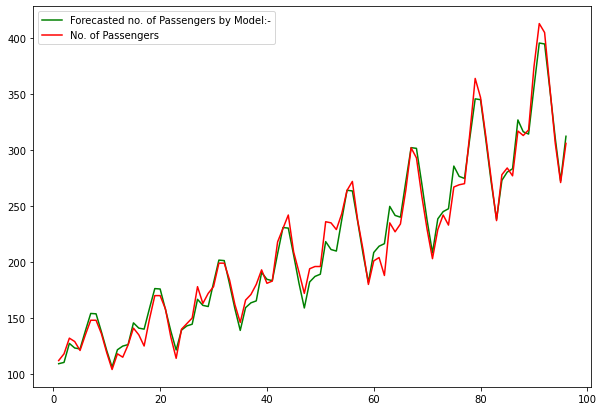

In [86]:
plt.figure(figsize=(10,7))
plt.plot(data.t,data.Forecasted,color='green',label='Forecasted no. of Passengers by Model:-')
plt.plot(data.t,data.Passengers,color='red',label='No. of Passengers')
plt.legend()
plt.show()